This data frame contains the following columns:\
\
Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)\
\
The goal is to answer the following questions:\
-Can the physicochemical characteristics determine the quality of the wine?\
-Which variables are most correlated with the score?

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
wine = pd.read_csv('/content/gdrive/MyDrive/WineQT.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### **1. Analyze the raw dataset**

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

There are no null values and all feature data types are numeric

In [ ]:
wine.nunique().sort_values() 

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

In [ ]:
wine.drop('Id',axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92916474d0>,
      dtype=object)

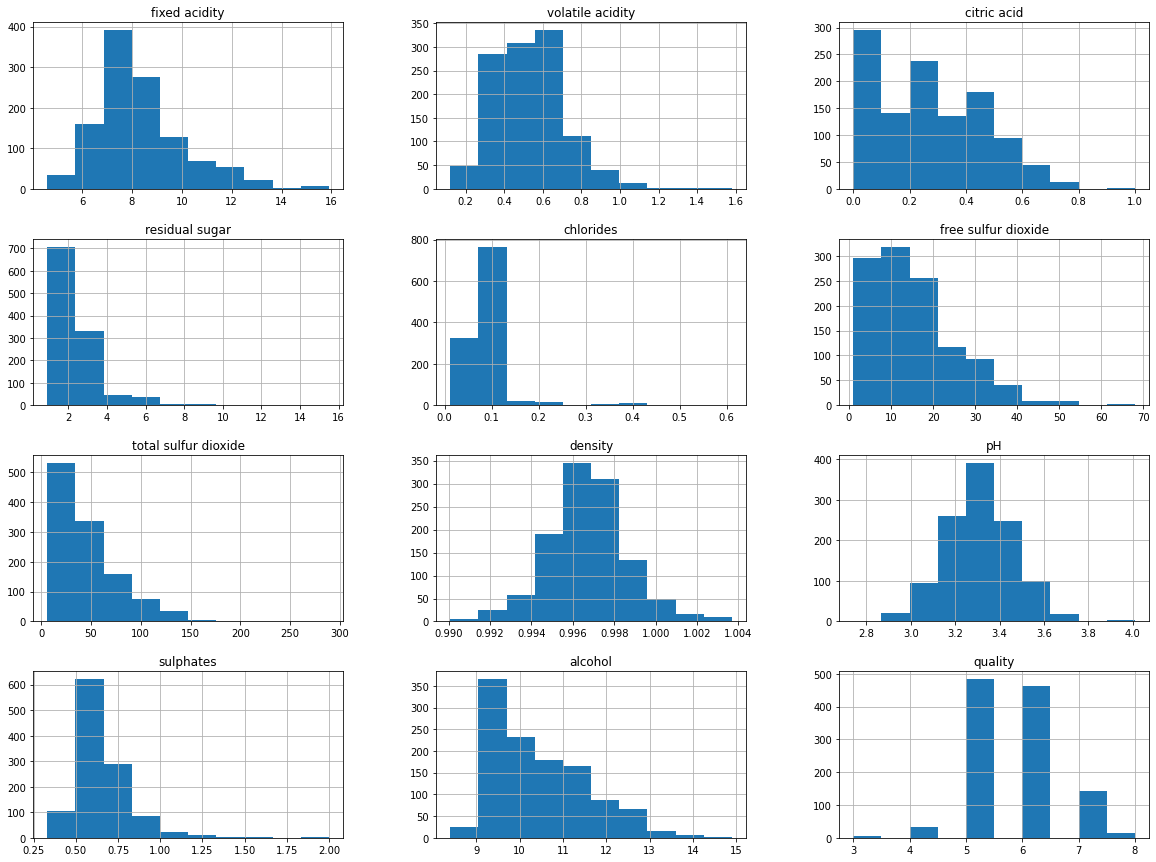

In [ ]:
#Evaluation of the distribution of each feature

wine.loc[:, wine.columns != 'Id'].hist(figsize = (20,15))

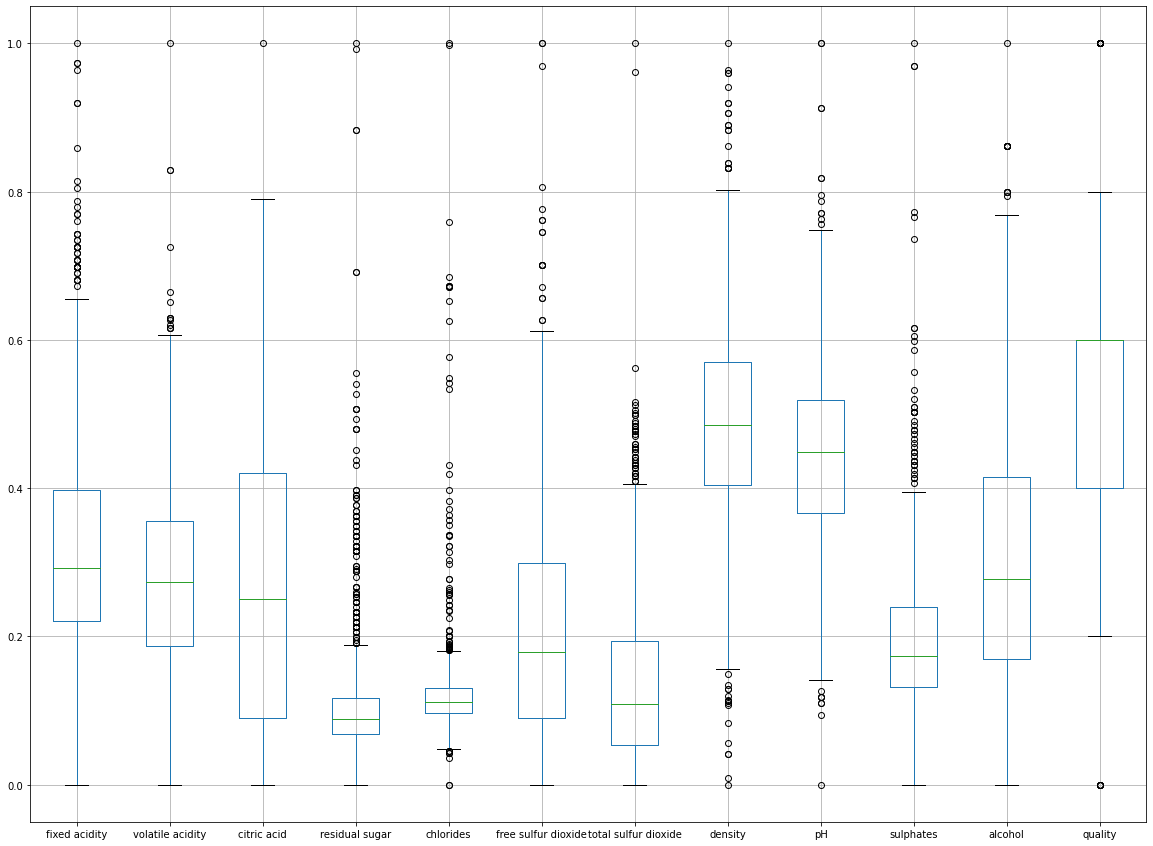

In [ ]:
norm_wine=(wine-wine.min())/(wine.max()-wine.min())
norm_wine.loc[:, norm_wine.columns != 'Id'].boxplot(figsize = (20,15))

In [ ]:
#Remove outliers

import numpy as np
from scipy import stats

#Calculate z-score
z = np.abs(stats.zscore(wine))

#threshold = 3

#Keep rows with Z-score less than 3
wine = wine[(z < 3).all(axis=1)]

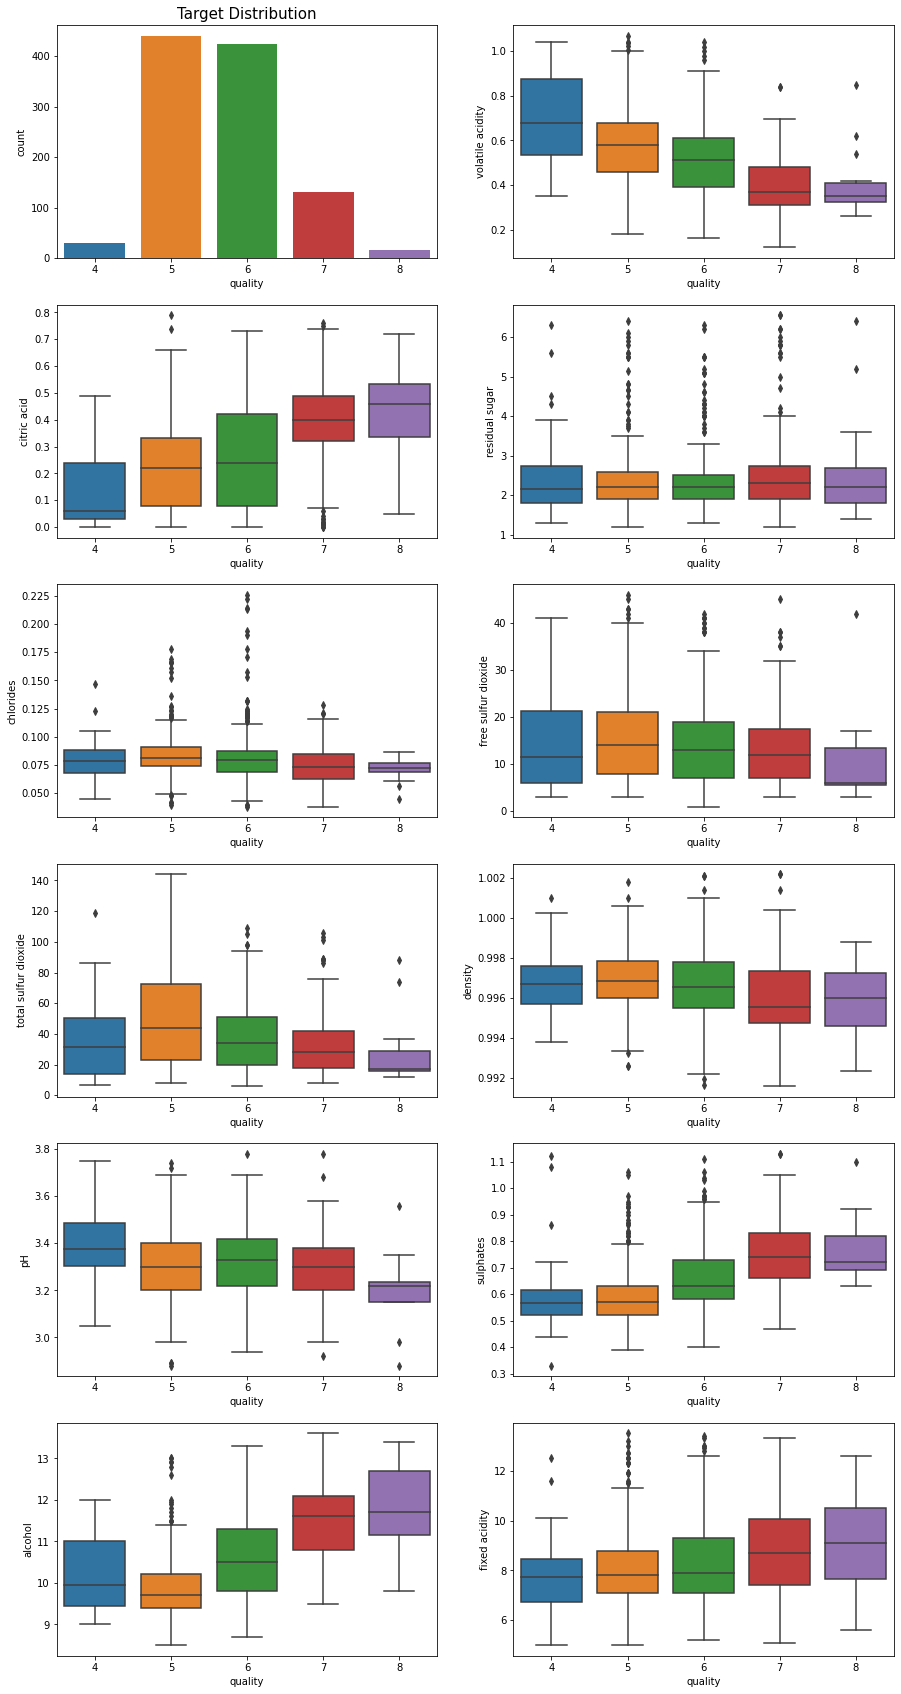

In [ ]:
#Boxplot features against wine quality

import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(6,2,figsize=(15,30))
sns.countplot(x=wine.quality,ax=ax[0][0]).set_title('Target Distribution',size=15)
sns.boxplot(x=wine.quality,y=wine['volatile acidity'],ax=ax[0][1])
sns.boxplot(x=wine.quality,y=wine['citric acid'],ax=ax[1][0])
sns.boxplot(x=wine.quality,y=wine['residual sugar'],ax=ax[1][1])
sns.boxplot(x=wine.quality,y=wine['chlorides'],ax=ax[2][0])
sns.boxplot(x=wine.quality,y=wine['free sulfur dioxide'],ax=ax[2][1])
sns.boxplot(x=wine.quality,y=wine['total sulfur dioxide'],ax=ax[3][0])
sns.boxplot(x=wine.quality,y=wine['density'],ax=ax[3][1])
sns.boxplot(x=wine.quality,y=wine['pH'],ax=ax[4][0])
sns.boxplot(x=wine.quality,y=wine['sulphates'],ax=ax[4][1])
sns.boxplot(x=wine.quality,y=wine['alcohol'],ax=ax[5][0])
sns.boxplot(x=wine.quality,y=wine['fixed acidity'],ax=ax[5][1])

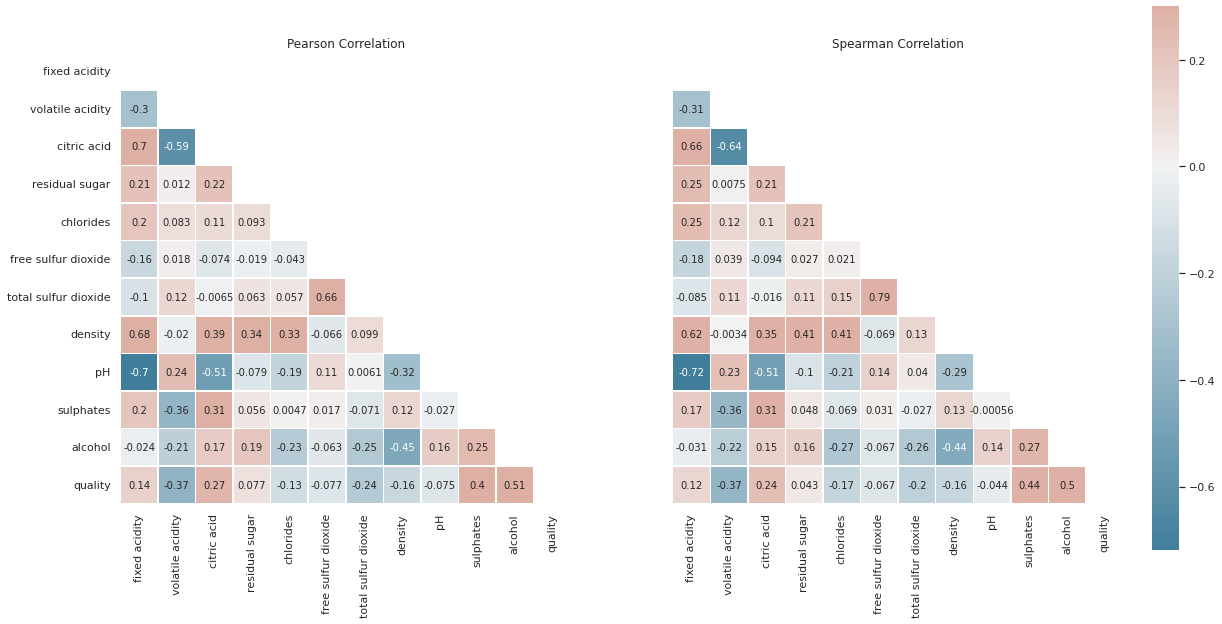

In [ ]:
#Look for correlations between features and target

sns.set_theme(style="white")

# Compute the correlation matrix
corr_p = wine.loc[:, wine.columns != 'Id'].corr()
corr_s = wine.loc[:, wine.columns != 'Id'].corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_s, dtype=bool))

# Set up the matplotlib figure
f,(ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(20,20), gridspec_kw={'width_ratios':[1,1.25]})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g1 = sns.heatmap(corr_p, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot_kws={"fontsize":10}, cbar= False, ax=ax1)
ax1.title.set_text('Pearson Correlation')

g2 = sns.heatmap(corr_s, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot_kws={"fontsize":10}, cbar_kws={"shrink": .5}, ax=ax2)
ax2.title.set_text('Spearman Correlation')

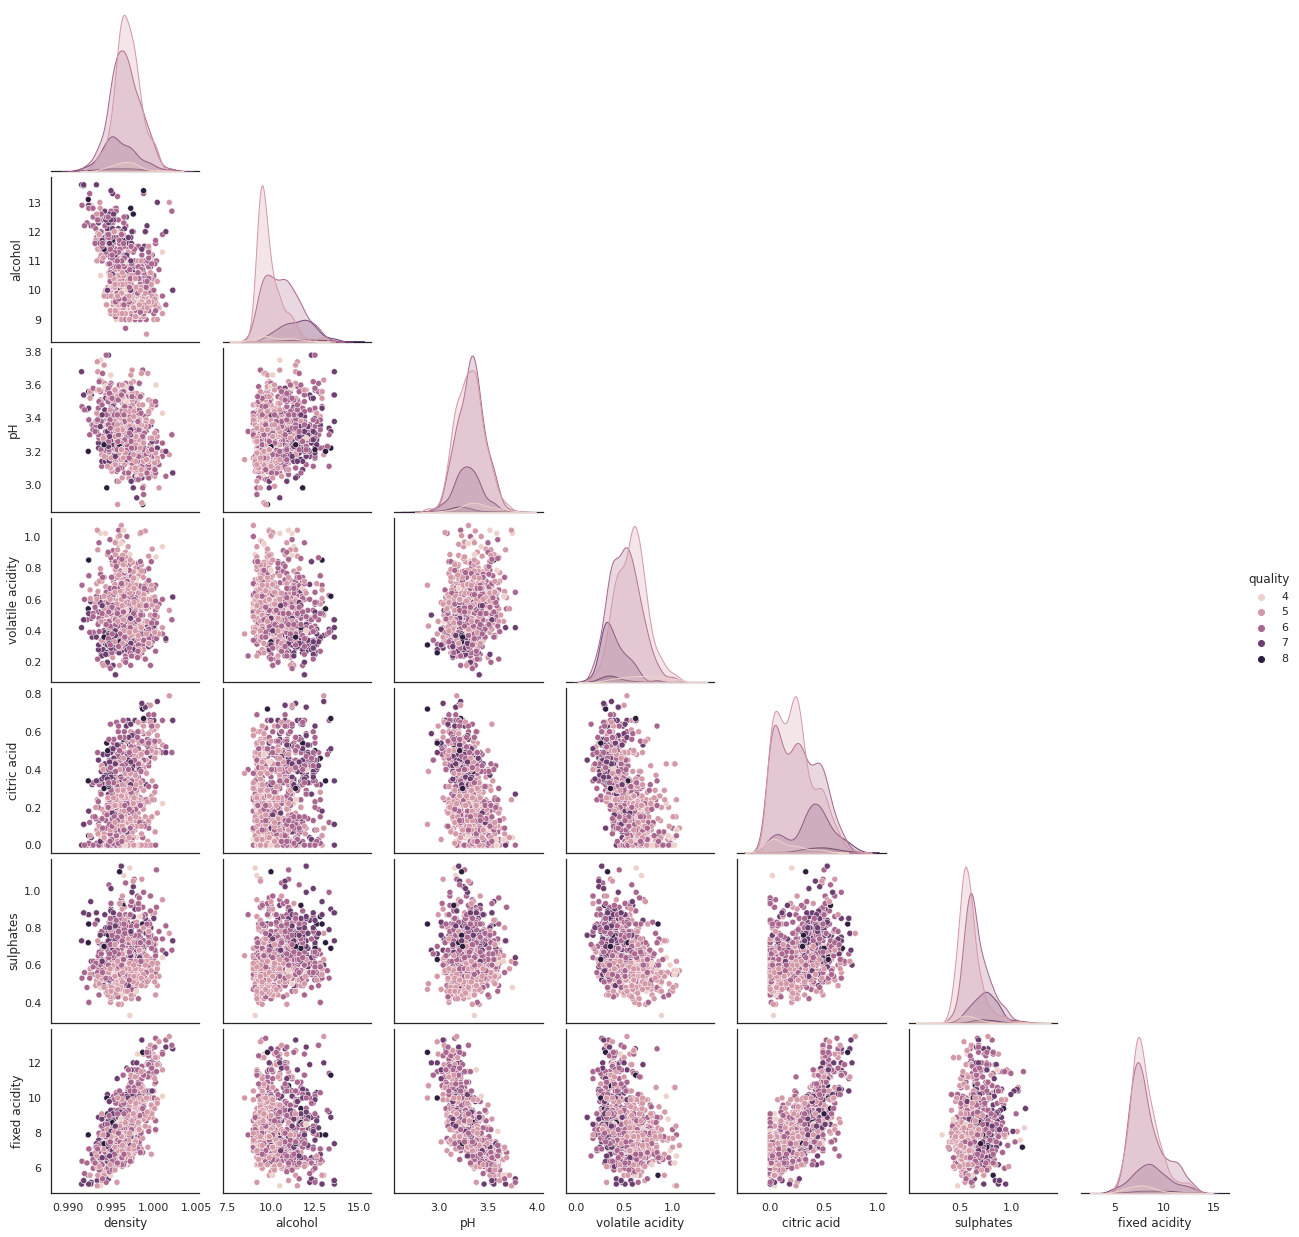

In [ ]:
#Look for trends between high correlated features and target

sns.pairplot(wine,corner=True, hue='quality',
            x_vars=['density','alcohol','pH','volatile acidity','citric acid','sulphates','fixed acidity'],
            y_vars=['density','alcohol','pH','volatile acidity','citric acid','sulphates','fixed acidity']
            )

Text(0.5, 0, 'Skewness')

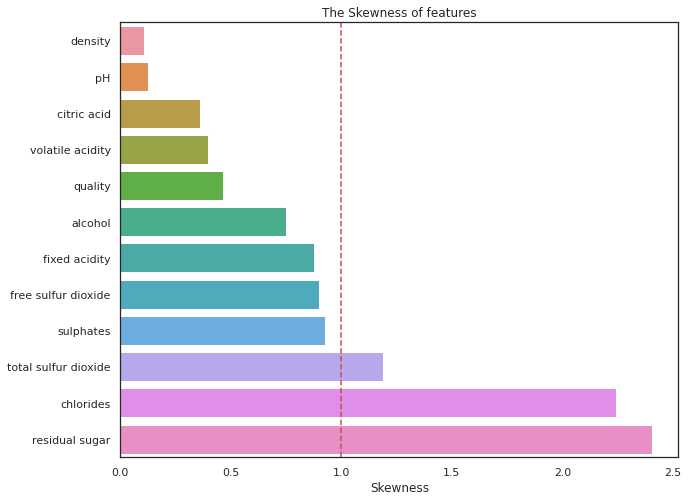

In [ ]:
#Evaluate skewness

plt.figure(figsize=(10,8))
skewness=wine.skew().sort_values()
sns.barplot(x=skewness,y=skewness.index).set_title('The Skewness of features')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('Skewness')

In [ ]:
#Transform hihgly skewed features

wine['total sulfur dioxide']=wine['total sulfur dioxide'].apply(np.log)
wine['chlorides']=wine['chlorides'].apply(np.log)
wine['residual sugar']=wine['residual sugar'].apply(np.log)

In [ ]:
wine['quality'].value_counts()

5    440
6    425
7    131
4     30
8     15
Name: quality, dtype: int64

The complexity arises due to the fact that the data set has few samples and imbalanced classes

In [ ]:
# Apply SMOTE

from imblearn.over_sampling import SMOTE

X=wine.drop(['quality'],axis=1)
y=wine['quality']

strategy={4:350,7:350,8:350}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

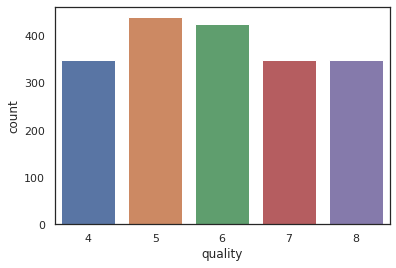

In [ ]:
sns.countplot(x=y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

scaler=StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1532, 11)
(383, 11)
(1532,)
(383,)


In [ ]:
#Evaluate a given model using cross-validation

from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RandomForest = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [10,11,12,13,14,15,16,17,18,19,20],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
RandomForest = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=19, criterion='gini')

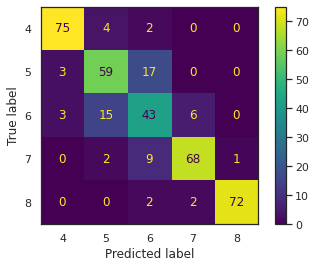

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay

#Fit and predict output for X_valid
RandomForest.fit(X_train,y_train)
y_pred = RandomForest.predict(X_test)

#Visualize Confusion matrix
CM=confusion_matrix(y_pred,y_test,labels=RandomForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=RandomForest.classes_)
disp.plot(cmap='viridis')

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           4       0.93      0.93      0.93        81
           5       0.74      0.75      0.74        79
           6       0.59      0.64      0.61        67
           7       0.89      0.85      0.87        80
           8       0.99      0.95      0.97        76

    accuracy                           0.83       383
   macro avg       0.83      0.82      0.82       383
weighted avg       0.83      0.83      0.83       383



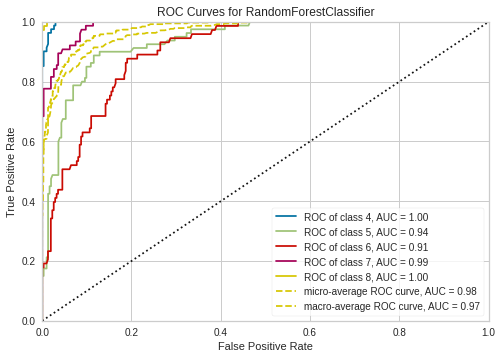

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f928af85c10>,
       estimator=RandomForestClassifier(max_depth=19, n_estimators=500,
                                        random_state=42))

In [ ]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

plot_ROC_curve(RandomForest, X_train, y_train, X_test, y_test)